# Question 3

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Preprocessing

In [2]:
house_df = pd.read_csv("../data/house.csv")
house_df

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage,home_price
0,0.00632,2.31,0,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,7.07,0,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.02729,7.07,0,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.03237,2.18,0,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.06905,2.18,0,7.147,54.2,6.0622,3,222,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,6.593,69.1,2.4786,1,273,9.67,22.4
502,0.04527,11.93,0,6.120,76.7,2.2875,1,273,9.08,20.6
503,0.06076,11.93,0,6.976,91.0,2.1675,1,273,5.64,23.9
504,0.10959,11.93,0,6.794,89.3,2.3889,1,273,6.48,22.0


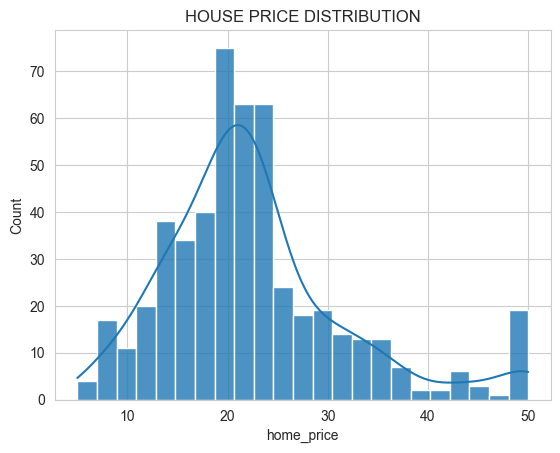

In [32]:
sns.histplot(house_df["home_price"], alpha=0.8, kde=True)
plt.title("HOUSE PRICE DISTRIBUTION")
plt.show()

In [4]:
house_df["Luxury"].value_counts()
# Shows it is a categorical data

Luxury
0    471
1     35
Name: count, dtype: int64

In [5]:
house_df["Highways"].value_counts()

Highways
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

## Standardizing data

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [7]:
columns_ = ["crime_rate", "pprime_land", "Rooms", "age", "Central_location", "Tax_rate", "poor_percentage"]
for i in columns_:
    house_df[i] = ss.fit_transform(np.array(house_df[i]).reshape(-1, 1))
house_df

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage,home_price
0,-0.417713,-1.287909,0,0.413672,-0.120013,0.140214,1,-0.666608,-1.075562,24.0
1,-0.415269,-0.593381,0,0.194274,0.367166,0.557160,2,-0.987329,-0.492439,21.6
2,-0.415272,-0.593381,0,1.282714,-0.265812,0.557160,2,-0.987329,-1.208727,34.7
3,-0.414680,-1.306878,0,1.016303,-0.809889,1.077737,3,-1.106115,-1.361517,33.4
4,-0.410409,-1.306878,0,1.228577,-0.511180,1.077737,3,-1.106115,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...
501,-0.411157,0.115738,0,0.439316,0.018673,-0.625796,1,-0.803212,-0.418147,22.4
502,-0.413178,0.115738,0,-0.234548,0.288933,-0.716639,1,-0.803212,-0.500850,20.6
503,-0.411374,0.115738,0,0.984960,0.797449,-0.773684,1,-0.803212,-0.983048,23.9
504,-0.405689,0.115738,0,0.725672,0.736996,-0.668437,1,-0.803212,-0.865302,22.0


## Dataset Split

In [8]:
X = house_df.iloc[:, :-1]
X

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage
0,-0.417713,-1.287909,0,0.413672,-0.120013,0.140214,1,-0.666608,-1.075562
1,-0.415269,-0.593381,0,0.194274,0.367166,0.557160,2,-0.987329,-0.492439
2,-0.415272,-0.593381,0,1.282714,-0.265812,0.557160,2,-0.987329,-1.208727
3,-0.414680,-1.306878,0,1.016303,-0.809889,1.077737,3,-1.106115,-1.361517
4,-0.410409,-1.306878,0,1.228577,-0.511180,1.077737,3,-1.106115,-1.026501
...,...,...,...,...,...,...,...,...,...
501,-0.411157,0.115738,0,0.439316,0.018673,-0.625796,1,-0.803212,-0.418147
502,-0.413178,0.115738,0,-0.234548,0.288933,-0.716639,1,-0.803212,-0.500850
503,-0.411374,0.115738,0,0.984960,0.797449,-0.773684,1,-0.803212,-0.983048
504,-0.405689,0.115738,0,0.725672,0.736996,-0.668437,1,-0.803212,-0.865302


In [9]:
y = house_df.iloc[:, -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: home_price, Length: 506, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69, test_size=0.25)

In [11]:
X_train

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage
312,-0.387979,-0.180458,0,-0.372740,0.776113,-0.456850,4,-0.619094,-0.130791
46,-0.396517,-0.616727,0,-0.710384,-1.254396,0.620527,3,-1.040783,0.209831
286,-0.416161,-1.368160,0,-0.077835,-1.318405,2.516679,1,-0.993269,0.038819
306,-0.409713,-1.306878,0,1.617508,0.118242,-0.330782,7,-1.106115,-0.866703
67,-0.411709,-0.739290,0,-0.579315,-1.677566,1.284902,4,-0.375583,-0.638220
...,...,...,...,...,...,...,...,...,...
90,-0.412995,-1.127409,0,0.188576,-0.088009,-0.334062,2,-0.821030,-0.538697
107,-0.403176,-0.375976,0,-0.224575,0.591198,-0.795123,5,-0.143951,0.201421
457,0.536407,1.015999,0,-0.496685,0.416951,-0.482900,24,1.530926,0.600916
203,-0.414362,-1.233923,0,2.234386,-1.257952,0.628893,4,-1.094237,-1.239566


## Multiple Linear Regresion Model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = regressor.predict(X_test)

In [15]:
pred

array([29.79008251, 28.58951023, 18.79833133, 24.11327025, 29.60441561,
       17.31627105, 16.30935287, 19.92615607, 15.7875817 , 25.9815913 ,
       22.86657576, 25.80137299, 21.15514427, 19.15532328, 19.92787109,
       25.72685155, 18.97087407, 38.38410875, 27.5976203 , 22.5702746 ,
       20.98103863, 23.81897546, 26.60771976, 27.36669216, 18.93737909,
       32.50726072, 17.96480677, 18.38334386, 17.96524753, 28.85838268,
       -4.95529671, 31.39057383, 14.08419853, 27.47674374, 27.65294702,
       32.26670848, 16.26972365, 15.08219502, 21.91718997, 24.52112095,
       20.43761095, 20.82763678, 26.53506719, 18.40177085,  0.75915178,
       29.51060622, 26.3663565 , 24.11872358, 23.11810131, 26.99100708,
       17.00067607, 32.60627943, 24.71927679, 26.88199919, 15.07685193,
       32.58900226, 30.30567193,  9.50732171, 27.81211954, 28.01257384,
       33.60509682, 19.81950213, 12.65090021, 31.63991987, 25.38682494,
       29.07843249, 23.11868386, 23.06215201, 18.30689202, 37.60

## Metrics

In [16]:
from sklearn.metrics import mean_squared_error as mse
mse_lr = mse(y_test, pred)
mse_lr

27.28078151654034

## Visualising the Trend

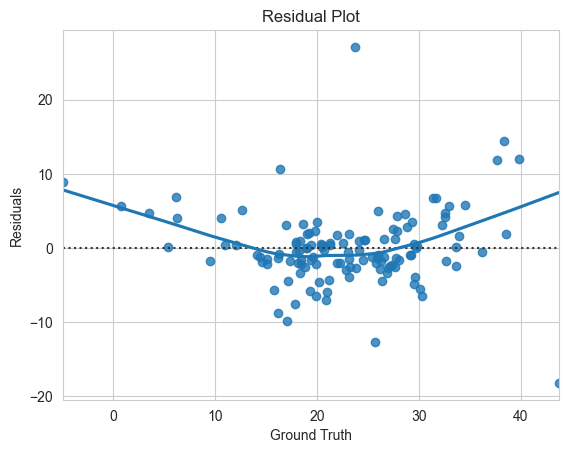

In [20]:
residuals = y_test - pred
sns.residplot(x=pred, y=residuals, lowess=True)
plt.title("Residual Plot")
plt.xlabel("Ground Truth")
plt.ylabel("Residuals")
plt.show()

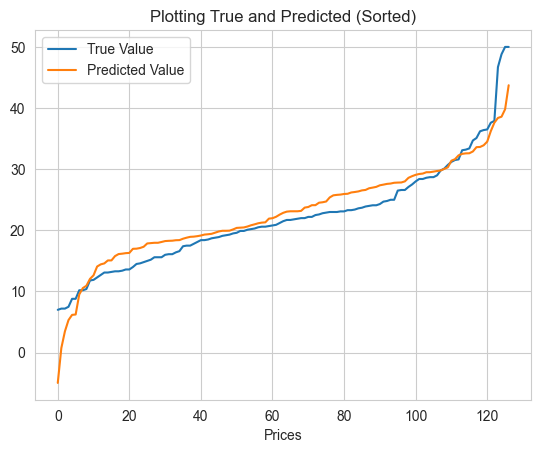

In [18]:
plt.plot(range(len(y_test)), sorted(y_test), label="True Value")
plt.plot(range(len(pred)), sorted(pred), label="Predicted Value")
plt.xlabel("Prices")
plt.title("Plotting True and Predicted (Sorted)")
plt.legend()
plt.show()

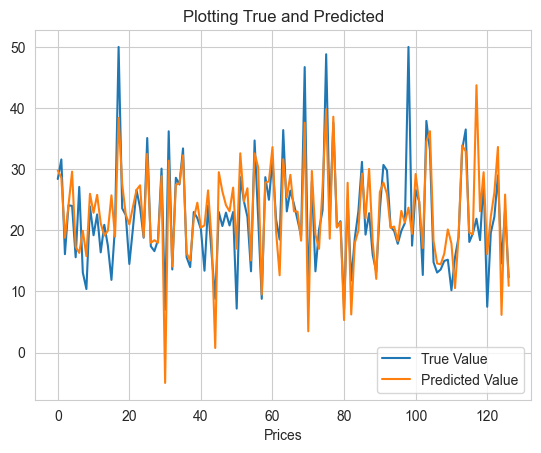

In [19]:
plt.plot(range(len(y_test)), y_test, label="True Value")
plt.plot(range(len(pred)), pred, label="Predicted Value")
plt.xlabel("Prices")
plt.title("Plotting True and Predicted")
plt.legend()
plt.show()